In [3]:
#import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import json
import re
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df = pd.read_csv("cleaned data/產量_臺灣香蕉生產概況(2011~2019).csv")
df

,年度,地區別,果品類別,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
0,2019,新北市,香蕉,108619,102262,74.99,71.01,13.74,19793.48,1405.54
1,2019,台北市,香蕉,12830,12830,10.36,10.36,12.55,15543.15,161.03
2,2019,桃園市,香蕉,44420,43940,57.11,56.47,18.85,14666.65,828.23
3,2019,台中市,香蕉,574129,560455,629.71,614.39,15.54,14178.52,8711.14
4,2019,台南市,香蕉,1481610,1476420,1062.65,1057.46,16.26,22703.58,24008.13
...,...,...,...,...,...,...,...,...,...,...
193,2011,基隆市,香蕉,3786,3786,3.57,3.57,9.22,9782.07,34.92
194,2011,新竹市,香蕉,8802,8802,5.64,5.64,14.38,22448.58,126.61
195,2011,嘉義市,香蕉,79710,79710,53.14,53.14,12.05,18081.60,960.86
196,2011,金門縣,香蕉,0,0,0.00,0.00,0.00,0.00,0.00


### 選取欲使用欄位

In [5]:
cols = ['年度', '地區別', '果品類別', '種植面積_公頃', '收穫面積_公頃', '產量_公噸']
df_test = df[cols]

In [6]:
df_test.dtypes

年度           int64
地區別         object
果品類別        object
種植面積_公頃    float64
收穫面積_公頃    float64
產量_公噸      float64
dtype: object

### 輔助圖表(2011~2019變化)

#### 總產量趨勢圖

In [7]:
df.groupby("年度").sum()

,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
年度,,,,,,,
2011,20971974,20103612,13788.32,13257.18,293.62,400678.97,305739.59
2012,20039523,19547136,13248.75,12947.23,291.23,403129.56,295264.57
2013,20195626,19699616,13343.58,13042.40,288.76,394175.80,291292.49
2014,21344675,20135253,13997.00,13290.00,285.00,390040.00,299899.00
2015,22264196,21397948,14605.44,14093.10,253.56,346563.41,274066.17
2016,24459685,23919663,16016.25,15697.01,233.32,317470.19,257558.68
2017,25802954,24104244,16841.64,15803.75,289.83,404807.01,356016.97
2018,25649008,23597696,16640.00,15447.00,311.00,437199.00,356238.00
2019,24994633,22625433,16341.72,14913.99,308.59,434114.19,342628.59


In [8]:
x = np.arange(2011, 2020)
y = df.groupby("年度").sum()

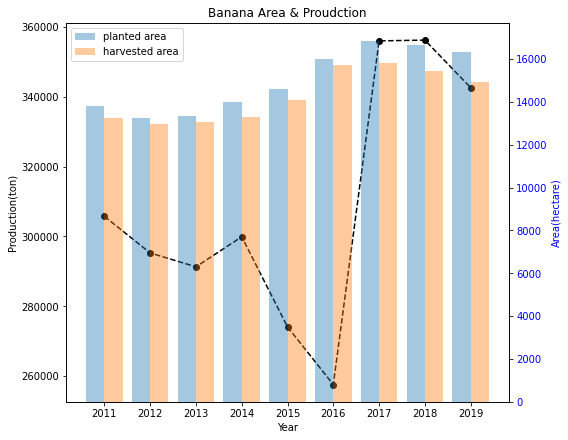

In [9]:
fig, ax1 = plt.subplots(figsize=(8,6))

width = 0.2
ax1.set_xticks(x)
ax1.plot(x, y["產量_公噸"], "--", marker="o", color="black")
ax1.set_xlabel("Year")
ax1.set_ylabel("Production(ton)", color="black")
ax1.tick_params(axis="y", labelcolor="black")

ax2 = ax1.twinx()
ax2.bar(x-width, y["種植面積_公頃"], width=0.4, alpha=0.4, label="planted area")
ax2.bar(x+width, y["收穫面積_公頃"], width=0.4, alpha=0.4, label="harvested area")
ax2.set_ylabel("Area(hectare)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

fig.tight_layout()
plt.title("Banana Area & Proudction")
plt.legend()
# plt.savefig("banana area & production.jpg", bbox_inches="tight")
plt.show()


In [10]:
df.dtypes

年度              int64
地區別            object
果品類別           object
種植株數            int64
收穫株數            int64
種植面積_公頃       float64
收穫面積_公頃       float64
每株平均產量_公斤     float64
每公頃平均產量_公斤    float64
產量_公噸         float64
dtype: object

### 取得2019年度全國香蕉生產資料

In [11]:
data = df.loc[(df["年度"] == 2019)]
data

,年度,地區別,果品類別,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
0,2019,新北市,香蕉,108619,102262,74.99,71.01,13.74,19793.48,1405.54
1,2019,台北市,香蕉,12830,12830,10.36,10.36,12.55,15543.15,161.03
2,2019,桃園市,香蕉,44420,43940,57.11,56.47,18.85,14666.65,828.23
3,2019,台中市,香蕉,574129,560455,629.71,614.39,15.54,14178.52,8711.14
4,2019,台南市,香蕉,1481610,1476420,1062.65,1057.46,16.26,22703.58,24008.13
5,2019,高雄市,香蕉,3874181,3806097,2155.98,2117.37,13.76,24739.26,52382.17
6,2019,宜蘭縣,香蕉,170454,168384,114.10,112.72,18.05,26956.74,3038.56
7,2019,新竹縣,香蕉,154451,153659,107.42,106.89,12.28,17655.75,1887.22
8,2019,苗栗縣,香蕉,151576,151576,115.54,115.54,19.05,24988.74,2887.20
9,2019,彰化縣,香蕉,197594,194955,132.91,131.20,16.22,24100.68,3162.01


In [12]:
df_2019 = data[["地區別", "果品類別", "產量_公噸"]].sort_values(by="產量_公噸", ascending=False)

In [13]:
df_2019["地區別"] = df_2019["地區別"].str.replace("台", "臺")

In [14]:
df_2019.columns = ["COUNTYNAME","fruits", "production"]

In [15]:
df_2019.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='COUNTYNAME'>

c:\users\tibame\pycharmprojects\pythonetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\tibame\pycharmprojects\pythonetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\tibame\pycharmprojects\pythonetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\tibame\pycharmprojects\pythonetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\tibame\pycharmprojects\pythonetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\tibame

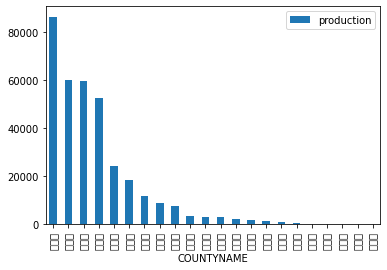

In [33]:
df_2019

### 比較產量與市場成交量之關係

In [20]:
df_price = pd.read_csv("cleaned data/價格_全國香蕉交易資料(初步清洗).csv")
df_price

,日期,市場,產品,上價,中價,下價,平均價(元/公斤),平均價_跟前一交易日比較%,交易量(公斤),交易量_跟前一交易日比較%,Year
0,2011-01-01,104 台北二,A1 香蕉,35.0,32.1,25.6,31.4,2,9645,-1,2011
1,2011-01-02,104 台北二,A1 香蕉,35.1,33.1,25.8,32.0,2,12230,27,2011
2,2011-01-04,104 台北二,A1 香蕉,35.8,33.1,27.0,32.4,0,11976,0,2011
3,2011-01-05,104 台北二,A1 香蕉,36.5,33.9,27.8,33.2,2,7520,-37,2011
4,2011-01-06,104 台北二,A1 香蕉,38.2,35.5,28.9,34.7,7,8160,-32,2011
...,...,...,...,...,...,...,...,...,...,...,...
31689,2021-06-08,930 台東市,A1 香蕉,28.0,18.3,12.0,20.7,-12,3115,1,2021
31690,2021-06-09,930 台東市,A1 香蕉,28.0,18.3,12.0,21.2,2,2885,-7,2021
31691,2021-06-10,930 台東市,A1 香蕉,24.0,16.8,11.0,18.7,-12,3885,35,2021
31692,2021-06-11,930 台東市,A1 香蕉,26.0,18.3,13.0,20.7,11,4522,16,2021


In [21]:
right = (df_price.groupby(["Year"]).sum()["交易量(公斤)"]/1000).to_frame()
right

,交易量(公斤)
Year,
2011,32571.832
2012,30939.624
2013,27613.824
2014,28624.061
2015,30526.863
2016,31352.153
2017,38688.968
2018,38207.192
2019,35034.649


In [22]:
left = df.groupby("年度").sum()["產量_公噸"].to_frame()
left

,產量_公噸
年度,
2011,305739.59
2012,295264.57
2013,291292.49
2014,299899.00
2015,274066.17
2016,257558.68
2017,356016.97
2018,356238.00
2019,342628.59


In [24]:
result = pd.merge(left, right, left_index=True, right_index=True, how="inner")
result.columns = ["產量(公噸)", "交易量(公噸)"]
result["rate"] = round(result["交易量(公噸)"] / result["產量(公噸)"], 2)
result

,產量(公噸),交易量(公噸),rate
2011,305739.59,32571.832,0.11
2012,295264.57,30939.624,0.10
2013,291292.49,27613.824,0.09
2014,299899.00,28624.061,0.10
2015,274066.17,30526.863,0.11
2016,257558.68,31352.153,0.12
2017,356016.97,38688.968,0.11
2018,356238.00,38207.192,0.11
2019,342628.59,35034.649,0.10


In [25]:
x = np.arange(2011, 2020)
y = df.groupby("年度").sum()

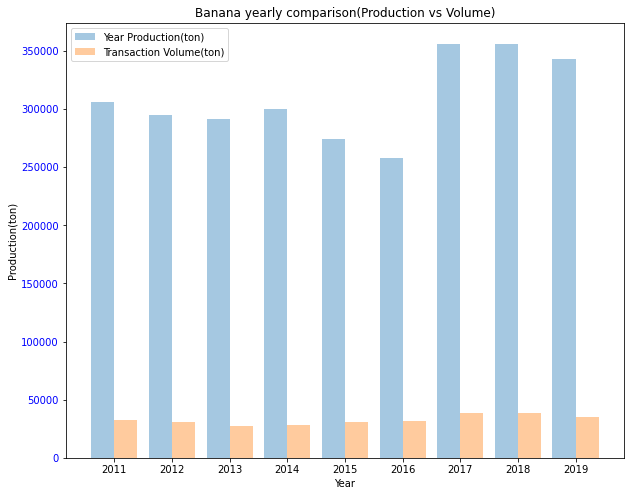

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

width = 0.2
ax.bar(x-width, result["產量(公噸)"], width=0.4, alpha=0.4, label="Year Production(ton)")
ax.bar(x+width, result["交易量(公噸)"], width=0.4, alpha=0.4, label="Transaction Volume(ton)")

ax.set_xticks(x)
ax.set_xlabel("Year")
ax.set_ylabel("Production(ton)")

ax.tick_params(axis="y", labelcolor="blue")

plt.title("Banana yearly comparison(Production vs Volume)")
plt.legend()
# plt.savefig("banana area & production.jpg", bbox_inches="tight")
plt.show()

## 透過GeoPandas將上面的結果顯示於地圖

### 從政府資料開放平台取得台灣縣市行政圖的邊界&經緯度

[台灣縣市地圖](https://data.gov.tw/dataset/7441)

In [31]:
city_shp = gpd.read_file("./mapdata202008310842/COUNTY_MOI_1090820.shp", encoding="utf-8")

NameError: name 'gpd' is not defined

In [ ]:
city_shp

### 台灣地圖

In [ ]:
fig,ax = plt.subplots(figsize = (10, 10))
city_shp.plot(ax=ax, color="grey") #cmap="RdBu")

ax.set_xlim(117,123)
ax.set_ylim(21,26)

### 將df_2019banana資料與city_shp進行merge

In [ ]:
whole_data = pd.merge(city_shp, df_2019banana, on="COUNTYNAME", how="left")

In [ ]:
whole_data

### Visualize the result on map

In [ ]:
fig,ax = plt.subplots(figsize = (10, 10))
whole_data.plot(ax=ax, column="production", cmap="YlGn")

ax.set_xlim(118,123)
ax.set_ylim(21,26)
ax.set_title("2019 Taiwan banana production overview", size = 20)
ax.set_facecolor("skyblue")

### 後續問題
- 如何加上顏色條?
- 排行榜?